In [231]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import os

In [232]:
# reading csv
df = pd.read_csv('Top_1000_Highest_Grossing_Movies_Of_All_Time.csv')
df.head() # prints first 5 columns

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
0,Avatar,2009,"Action,Adventure,Fantasy",7.8,162,$760.51M,"$2,847,397,339",83,"1,236,962",A paraplegic Marine dispatched to the moon Pan...
1,Avengers: Endgame,2019,"Action,Adventure,Drama",8.4,181,$858.37M,"$2,797,501,328",78,"1,108,641",After the devastating events of Avengers: Infi...
2,Titanic,1997,"Drama,Romance",7.9,194,$659.33M,"$2,201,647,264",75,"1,162,142",A seventeen-year-old aristocrat falls in love ...
3,Star Wars: Episode VII - The Force Awakens,2015,"Action,Adventure,Sci-Fi",7.8,138,$936.66M,"$2,069,521,700",80,"925,551","As a new threat to the galaxy rises, Rey, a de..."
4,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.4,149,$678.82M,"$2,048,359,754",68,"1,062,517",The Avengers and their allies must be willing ...


In [233]:
# shape attribute
df.shape

(1000, 10)

In [234]:
df.info()  # gives info of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Movie Title         1000 non-null   object 
 1   Year of Realease    1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Movie Rating        1000 non-null   float64
 4   Duration            1000 non-null   int64  
 5   Gross               1000 non-null   object 
 6   Worldwide LT Gross  1000 non-null   object 
 7   Metascore           1000 non-null   object 
 8   Votes               1000 non-null   object 
 9   Logline             1000 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


In [235]:
df.describe() # gives statistical insights

,Movie Rating,Duration
count,1000.00000,1000.000000
mean,6.80080,117.679000
std,0.90145,21.561885
min,2.50000,69.000000
25%,6.20000,102.000000
50%,6.80000,116.000000
75%,7.40000,130.000000
max,9.20000,238.000000


In [236]:
df.isnull().sum()  # to check null values

Movie Title           0
Year of Realease      0
Genre                 0
Movie Rating          0
Duration              0
Gross                 0
Worldwide LT Gross    0
Metascore             0
Votes                 0
Logline               0
dtype: int64

In [237]:
# cleaning the data
cleaning_list = ['Year of Realease', 'Gross', 'Worldwide LT Gross', 'Metascore', 'Votes']
for i in cleaning_list:
    df[i] = df[i].replace(r"[$|M|******|,|X]", "",regex=True)
    df[i] = pd.to_numeric(df[i])

In [238]:
df.head()

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
0,Avatar,2009,"Action,Adventure,Fantasy",7.8,162,760.51,2847397339,83.0,1236962,A paraplegic Marine dispatched to the moon Pan...
1,Avengers: Endgame,2019,"Action,Adventure,Drama",8.4,181,858.37,2797501328,78.0,1108641,After the devastating events of Avengers: Infi...
2,Titanic,1997,"Drama,Romance",7.9,194,659.33,2201647264,75.0,1162142,A seventeen-year-old aristocrat falls in love ...
3,Star Wars: Episode VII - The Force Awakens,2015,"Action,Adventure,Sci-Fi",7.8,138,936.66,2069521700,80.0,925551,"As a new threat to the galaxy rises, Rey, a de..."
4,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.4,149,678.82,2048359754,68.0,1062517,The Avengers and their allies must be willing ...


In [239]:
df.describe()

,Year of Realease,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes
count,1000.000000,1000.00000,1000.000000,966.000000,1.000000e+03,964.000000,1.000000e+03
mean,2007.611000,6.80080,117.679000,156.158975,4.105976e+08,59.644191,3.393784e+05
std,10.398067,0.90145,21.561885,110.629617,2.951927e+08,15.946919,3.231349e+05
min,1937.000000,2.50000,69.000000,0.010000,1.766002e+08,12.000000,3.960000e+02
25%,2002.000000,6.20000,102.000000,90.832500,2.220363e+08,48.000000,1.347940e+05
50%,2010.000000,6.80000,116.000000,129.245000,3.084121e+08,59.000000,2.448125e+05
75%,2016.000000,7.40000,130.000000,187.090000,4.733442e+08,71.000000,4.410002e+05
max,2022.000000,9.20000,238.000000,936.660000,2.847397e+09,100.000000,2.622926e+06


In [240]:
# null values after cleaning the data i.e; after changing data type
df[['Gross','Metascore']][df['Metascore'].isnull()]

,Gross,Metascore
65,0.34,NaN
89,NaN,NaN
138,NaN,NaN
159,NaN,NaN
184,1.54,NaN
271,2.36,NaN
301,NaN,NaN
304,0.71,NaN
380,NaN,NaN
448,NaN,NaN


In [241]:
df.iloc[11,5]

nan

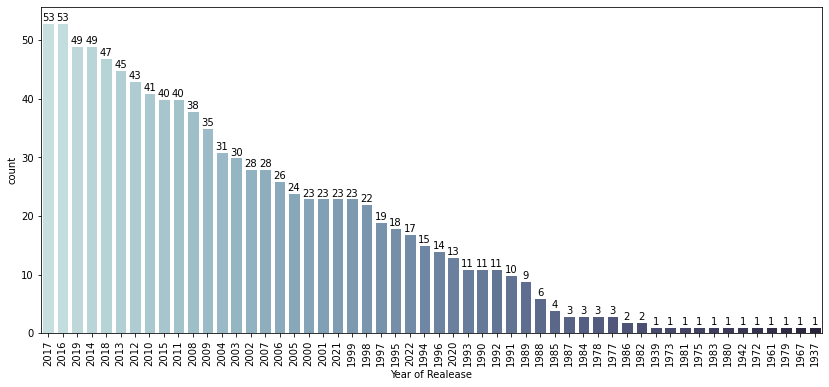

In [242]:
# Count Plot Graphic
# defining function to plot grapgh
def count_plot(data): 
    plt.figure(figsize=(14,6))
    ax = sns.countplot(x=data, palette= "ch:start=.2,rot=-.3", edgecolor='white', linewidth=1, order=data.value_counts().index)
    plt.xticks(rotation=90)    
    for c in ax.containers:
        ax.bar_label(c, fmt='%.0f', label_type='edge')
    
# count plot for year of release
count_plot(df['Year of Realease'])

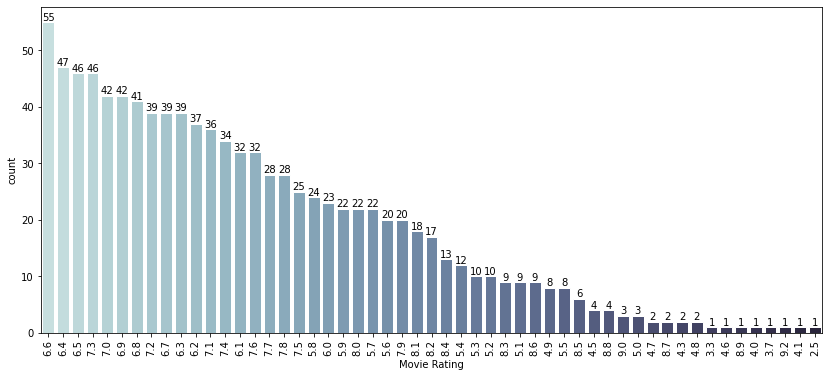

In [243]:
# count plot for movie rating
count_plot(df['Movie Rating'])

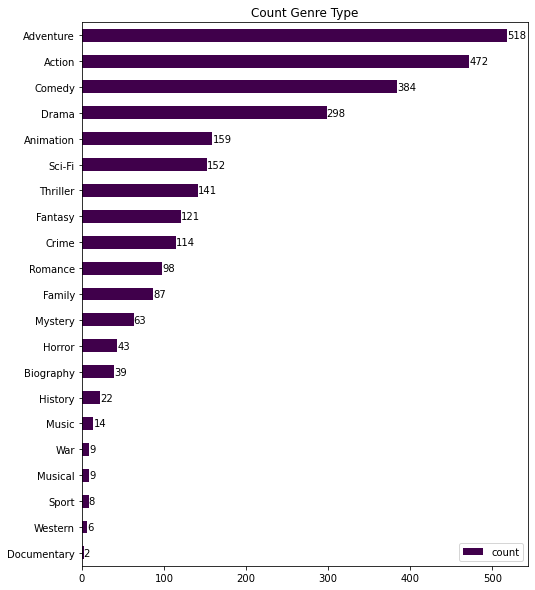

In [244]:
# Genre columns get dummies
gd_df_x = df['Genre'].str.get_dummies(sep=',')

# Genre columns
df_x = pd.DataFrame(gd_df_x.sum(),columns=['count'])
df_x.sort_values(by = 'count',ascending = True,inplace = True)

# plotting horizontal bar graph
ax = df_x.plot(kind='barh',cmap='PRGn',figsize=(8,10),title='Count Genre Type')
plt.legend(loc='lower right') # changing legend location
for c in ax.containers:
    ax.bar_label(c,fmt='%.0f',label_type='edge')

In [245]:
# defining function to plot top 10 of individeal data
def top_10_vis(data, title):
    top_10_gross = df[['Movie Title',data]][0:10]
    top_10_gross.sort_values(by=data, inplace=True)
    ax   = top_10_gross.plot(kind='barh',color='salmon', figsize=(9,8) , title= title)
    ax.set_yticklabels(list(top_10_gross['Movie Title']), minor=False)
    plt.ylabel('The name of the movie' ,fontsize=16)
    plt.xlabel(data ,fontsize=16)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.yaxis.set_tick_params(labelsize='large')

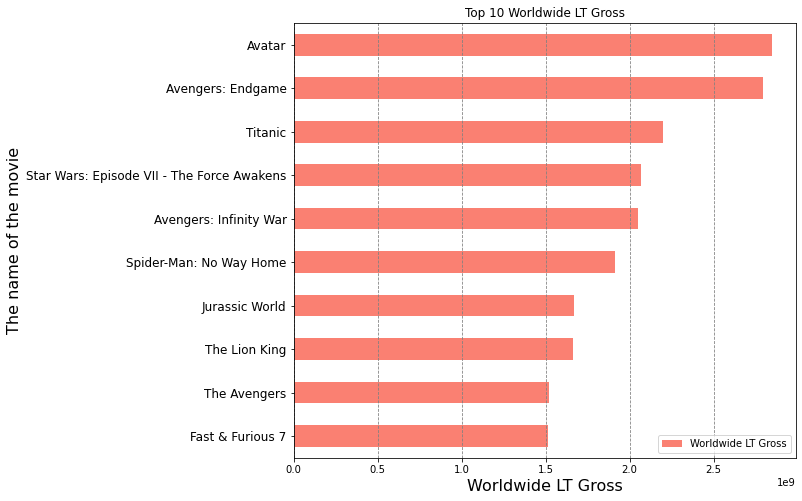

In [246]:
# plotting Top 10 Worldwide LT Gross
top_10_vis('Worldwide LT Gross','Top 10 Worldwide LT Gross' )

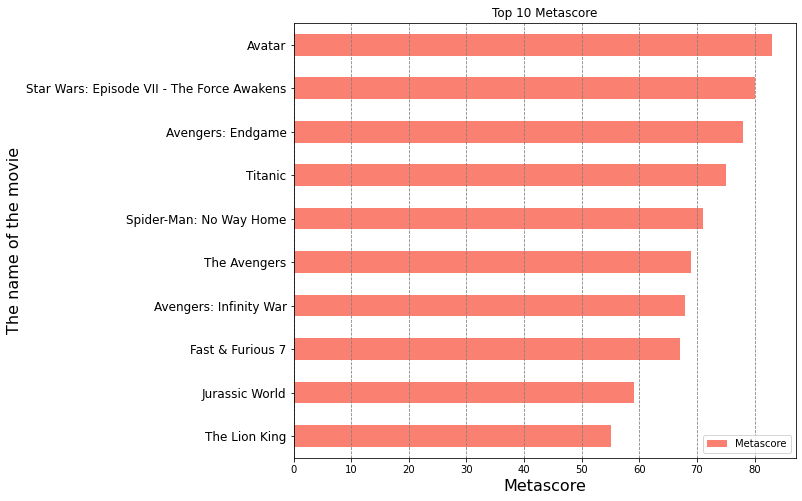

In [247]:
# plotting Top 10 Metascore
top_10_vis('Metascore','Top 10 Metascore')

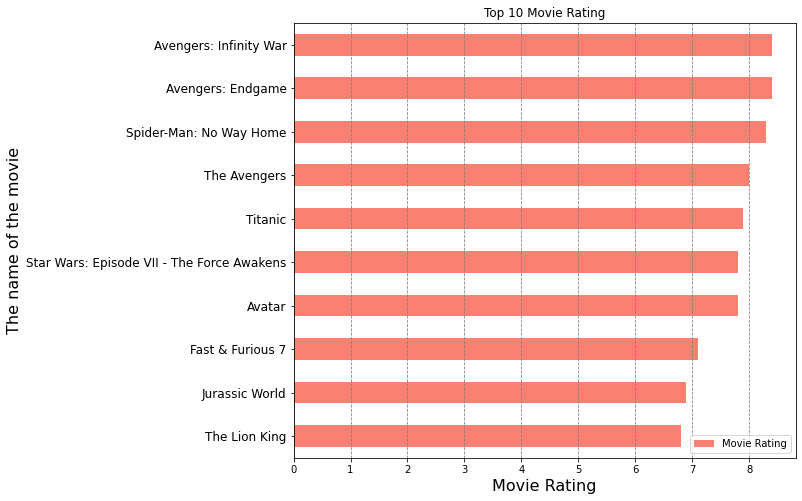

In [248]:
# plotting Top 10 Movie Rating
top_10_vis('Movie Rating','Top 10 Movie Rating' )

In [249]:
# function to format Worlwide LT Gross into readable number
def number_ord(num):
    num = float("{:.3g}".format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    result = "{}{}".format("{:f}".format(num).rstrip("0").rstrip('.'), ["", "K", "M", "B", "T"][magnitude])
    return result

In [250]:
# grouping all the genre to create a new dataframe
gen_df = df[['Genre','Worldwide LT Gross']]
gen_df = gen_df.dropna(how = 'any', axis = 0)  # dropping null values if any
gen_df['Genre'] = gen_df['Genre'].str.split(',')
gen_df = gen_df.explode('Genre')
gen_df = gen_df.groupby(['Genre']).median().sort_values(by = 'Worldwide LT Gross',ascending=False)

gen_df['Label'] = gen_df['Worldwide LT Gross'].apply(lambda x:"$" + number_ord(x))
# gen_df.reset_index(inplace=True)
gen_df

,Worldwide LT Gross,Label
Genre,,
Fantasy,403449830.0,$403M
Musical,396271103.0,$396M
Sci-Fi,392002999.5,$392M
Adventure,386320872.5,$386M
Animation,373515621.0,$374M
Action,352475309.5,$352M
Family,299820798.0,$300M
Thriller,293503354.0,$294M
History,282305622.0,$282M


In [251]:
# plotting bar graph with reference to genre
fig = px.bar(gen_df,width=700,height=700,x='Worldwide LT Gross',y=gen_df.index,title='Movie Genre vs. Worldwide LT Gross',text='Label',color=gen_df.index)
fig.show()